In [1]:
vertices = [1..13]

# BLUE EDGES
# edges_T = {
#     1: [3, 4, 5, 6],
#     2: [3],
#     6: [11],
#     7: [11],
#     8: [10, 11],
#     9: [10]
# }

# # # RED EDGES
# edges_T_prime = {
#     1: [9, 11],
#     2: [3, 5],
#     4: [5],
#     5: [9],
#     6: [8, 9],
#     7: [8],
#     9: [10]
# }

# SMALLER EXAMPLE
# edges_T = {
#     1: [2, 3],
#     3: [6],
#     4: [5, 6],
# }

# edges_T_prime = {
#     1: [6],
#     2: [5, 6],
#     3: [4, 5],
# }

# LOWER AND UPPER BOUND EXAMPLE
edges_T = {
    1: [4, 5],
    2: [4],
    3: [4],
    5: [8, 9],
    6: [8],
    7: [8],
    9: [12, 13],
    10: [12],
    11: [12]
}

edges_T_prime = {
    1: [11],
    2: [6, 11],
    3: [4, 5, 6],
    6: [10],
    7: [8, 9, 10],
    11: [13, 12]
}

In [2]:
def transform_edges_tuple_to_dict(edges):
    edges_dict = {}
    for e in edges:
        if not (e[0] in edges_dict):
            edges_dict[e[0]] = [e[1]]
        else:
            edges_dict[e[0]].append(e[1])

    return edges_dict

def transform_edges_dict_to_tuple(edges):
    edges_list = []
    for key in edges.keys():
        for v in edges[key]:
            edges_list.append((key, v))

    return edges_list

def invert_edge(e):
    return tuple((e[1], e[0]))

In [3]:
edges_T_prime = transform_edges_dict_to_tuple(edges_T_prime)
edges_T = transform_edges_dict_to_tuple(edges_T)

[(3, 4), (10, 12), (2, 11), (7, 10), (6, 8), (3, 6), (5, 9), (2, 4), (9, 13), (1, 5), (1, 11), (11, 13), (7, 9), (6, 10), (3, 5), (5, 8), (9, 12), (1, 4), (11, 12), (2, 6), (7, 8)]
[(3, 4), (7, 8), (11, 12)]


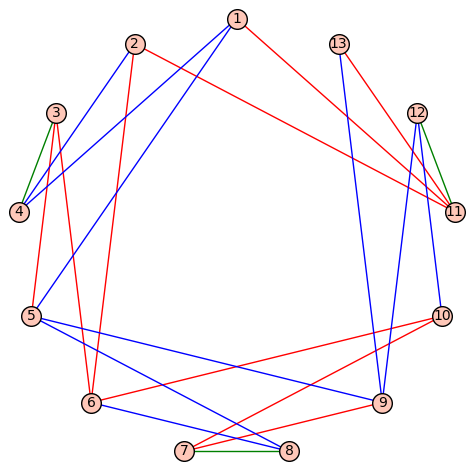

In [4]:
'''NORMAL REPRESENTATION OF THE GRAPH'''
total_edges = [*edges_T, *edges_T_prime]
total_edges = set(total_edges)
total_edges = list(total_edges)

n_G = Graph([vertices, total_edges],multiedges=True)

green_edges = [e for e in edges_T_prime if e in edges_T or invert_edge(e) in edges_T]
blue_edges = [e for e in edges_T if e not in green_edges and invert_edge(e) not in green_edges] 
red_edges = [e for e in edges_T_prime if e not in green_edges and invert_edge(e) not in green_edges] 

print(total_edges)
print(green_edges)

n_G.plot(edge_colors={"red": red_edges, "blue": blue_edges, "green": green_edges}, layout="circular")

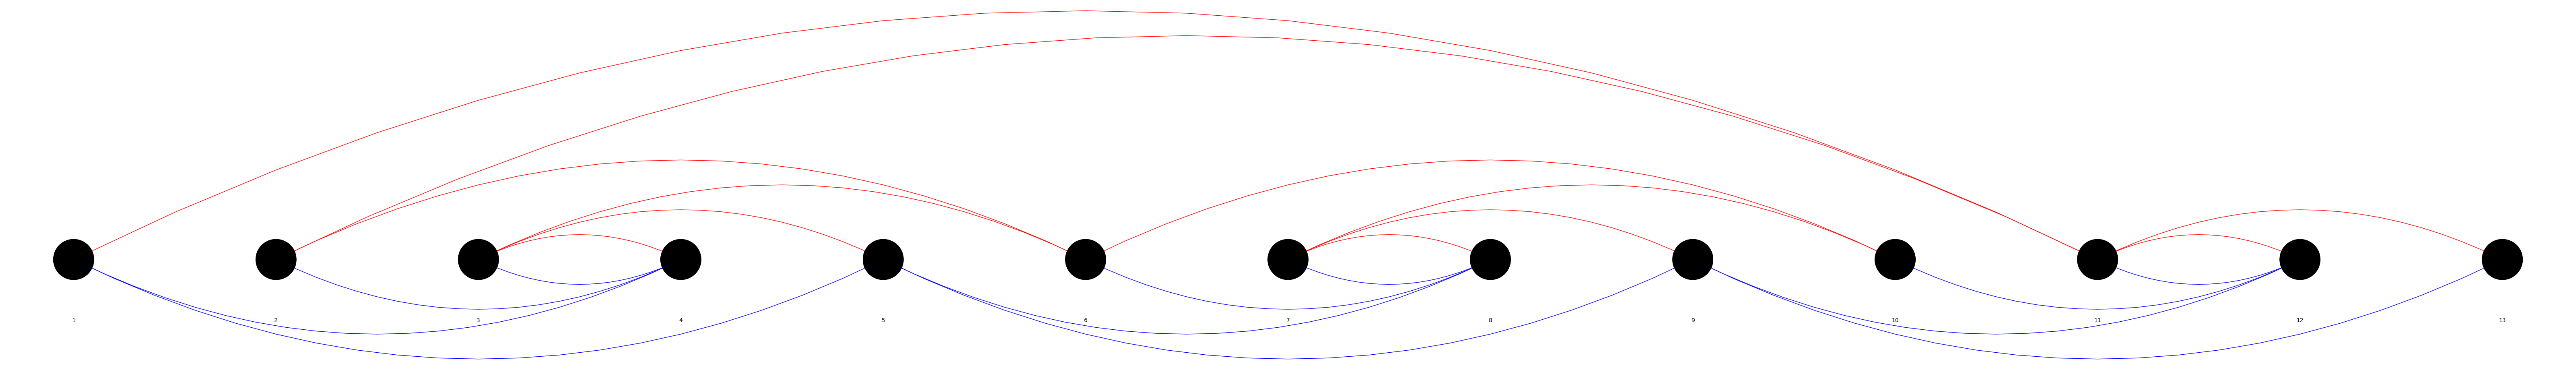

In [5]:
'''LINEAR REPRESENTATION OF THE GRAPH'''

def get_edge_span(edge):
    return sorted([edge[0]-1, edge[1]-1])  # Note: -1 because vertices are 1-based

def edges_overlap(edge1, edge2):
    span1 = get_edge_span(edge1)
    span2 = get_edge_span(edge2)
    return (span1[0] <= span2[0] <= span1[1]) or (span2[0] <= span1[0] <= span2[1])

def calculate_height(edge, all_edges, base_height):
    span = get_edge_span(edge)
    height_multiplier = (abs(edge[0] - edge[1]) / len(vertices))
    
    # for other_edge in all_edges:
    #     if other_edge == edge:
    #         continue
    #     other_span = get_edge_span(other_edge)
    #     if edges_overlap(edge, other_edge):
    #         # If the current edge spans further, it should go higher; This is particular for the covering edges
    #         if (span[1] - span[0]) > (other_span[1] - other_span[0]):
    #             height_multiplier = 1.5
    
    return base_height * height_multiplier

pos = {v: ((v-1) * 0.5, 0) for v in vertices}  #Note: Adjust positions to be 0-based

# green_edges = [e for e in edges_T_prime if e in edges_T or invert_edge(e) in edges_T]
# edges_T = [e for e in edges_T if e not in green_edges]
# edges_T_prime = [e for e in edges_T_prime if e not in green_edges]
blue_edges = edges_T
red_edges = edges_T_prime   


g = Graphics()

for v in vertices:
    x, y = pos[v]
    g += circle((x, y), 0.05, fill=True, color='black')
    g += text(str(v), (x, y-0.15), color='black', fontsize=10)

def curved_edge(start, end, height, color):
    x1, _ = pos[start]
    x2, _ = pos[end]
    mid_x = (x1 + x2)/2
    
    points = [(x1, 0)]
    num_points = 20
    for i in range(1, num_points):
        t = i/num_points
        # NOTE: BEZIER CURVE METHOD QUADRATIC INTERPOLATION METHOD FOR CURVED EDGES
        x = x1 * (1-t)**2 + mid_x * 2*t*(1-t) + x2 * t**2
        y = height * 4*t*(1-t)
        points.append((x, y))
    points.append((x2, 0))
    
    return line(points, color=color)

for edge in blue_edges:
    height = calculate_height(edge, blue_edges, -0.8)
    g += curved_edge(edge[0], edge[1], height, 'blue')

for edge in red_edges:
    height = calculate_height(edge, red_edges, 0.8)
    g += curved_edge(edge[0], edge[1], height, 'red')

# NOTE: HAPPY EDGES SHOULD BE COVERED IN GREEN
# for edge in green_edges:
#     x1, _ = pos[edge[0]]
#     x2, _ = pos[edge[1]]
#     g += line([(x1, 0), (x2, 0)], color='green')

# Set the aspect ratio and plot range
g.set_aspect_ratio(1)
g.axes(False)
g.show(figsize=[64, 64])

In [6]:
'''GAPS AND NEAR NEAR PAIRS'''
def get_all_gaps(V):
    gaps = []
    for v in range(len(V) - 1):
        gaps.append((V[v], V[v + 1]))

    return gaps

def transform_gaps_datastructure(gaps):
    gaps_dict = {}
    for g in range(len(gaps)):
        gaps_dict[f'g_{g + 1}'] = gaps[g]

    return gaps_dict

def get_edge_len(edge):
    return abs(edge[0] - edge[1])

def is_cover_edge_gap(edge, gap):
    return edge[0] <= gap[0] <= gap[1] <= edge[1]

def is_cover_edge_vertex(edge, vertex):
    return edge[0] <= vertex <= edge[1]

def is_part_of_gap(edge, gap):
    condition_1 = edge[0] == gap[0] or edge[1] == gap[1]
    condition_2 = edge[1] == gap[0] or edge[0] == gap[1]
    return condition_1 or condition_2

def get_smallest_edge(edges):
    smallest_distance = abs(edges[0][0] - edges[0][1]);
    smallest_edge = None
    for e in edges:
        if(smallest_distance >= abs(e[0] - e[1])):
            smallest_distance = abs(e[0] - e[1])
            smallest_edge = e
    return smallest_edge

In [7]:
'''
Algorithm thought process:

1. Given a gap (This is just an interval). Even further, since a gap is just a tuple of endpoints. You can just select the midpoint
    of the endpoints. For example: g_1 = (a,b) => select (a+b)/2
2. Get an array of edges for each tree. For example: E = [(1,2), (4,5)] and E_prime = [(3,4), (5,7)].
3. Iterate through E and E_prime and figure out the smallest edge covering the midpoint. Do this in two steps:
    a. First figure out if the edge covers the midpoint of the gap. Add the edge to a list.
    b. From the list above, select the smallest edge (By distance).
4. Remove the edge obtained from step 3.
'''

def find_near_near_pairs(gaps, edges_T, edges_T_prime):
    near_near_pairs = {}
    
    for gap in gaps:
        edges_in_T = [e for e in edges_T if is_cover_edge_gap(e, gap)]
        edges_in_T_prime = [e for e in edges_T_prime if is_cover_edge_gap(e, gap)]
        
        shortest_near_edge_T = get_smallest_edge(edges_in_T)
        shortest_near_edge_T_prime = get_smallest_edge(edges_in_T_prime)

        if shortest_near_edge_T:
            edges_in_T.remove(shortest_near_edge_T)
        if shortest_near_edge_T_prime:
            edges_in_T_prime.remove(shortest_near_edge_T_prime)

        is_short_edge = shortest_near_edge_T == gap or shortest_near_edge_T_prime == gap

        if (shortest_near_edge_T and shortest_near_edge_T_prime and 
            shortest_near_edge_T != shortest_near_edge_T_prime and
            is_part_of_gap(shortest_near_edge_T, gap) and
            is_part_of_gap(shortest_near_edge_T_prime, gap) and
            not is_short_edge
           ):
            near_near_pairs[gap] = [shortest_near_edge_T, shortest_near_edge_T_prime]

    return near_near_pairs

In [8]:
gaps = get_all_gaps(vertices)
gaps_dict = transform_gaps_datastructure(gaps)
near_near_pairs = find_near_near_pairs(gaps, edges_T, edges_T_prime)
print("Near-Near Pairs:", near_near_pairs, "LENGTH:", len(near_near_pairs))
print("All Gaps:", gaps)
print("All Gaps in Dictionary form:", gaps_dict)

Near-Near Pairs: {(1, 2): [(1, 4), (1, 11)], (2, 3): [(2, 4), (2, 6)], (4, 5): [(1, 5), (3, 5)], (5, 6): [(5, 8), (3, 6)], (6, 7): [(6, 8), (6, 10)], (8, 9): [(5, 9), (7, 9)], (9, 10): [(9, 12), (7, 10)], (10, 11): [(10, 12), (2, 11)], (12, 13): [(9, 13), (11, 13)]} LENGTH: 9
All Gaps: [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13)]
All Gaps in Dictionary form: {'g_1': (1, 2), 'g_2': (2, 3), 'g_3': (3, 4), 'g_4': (4, 5), 'g_5': (5, 6), 'g_6': (6, 7), 'g_7': (7, 8), 'g_8': (8, 9), 'g_9': (9, 10), 'g_10': (10, 11), 'g_11': (11, 12), 'g_12': (12, 13)}


In [9]:
# NOTE: This will get rid of duplicates in the type 1
def get_rid_duplicates(pairs):
    seen = set()
    result = []
    
    for pair in pairs:
        sorted_pair = frozenset(pair)  # Ignore order
        if sorted_pair not in seen:
            seen.add(sorted_pair)
            result.append(pair)

    return result

def is_unique_pair(pairs, new_pair):
    seen = {frozenset(pair) for pair in pairs}
    
    return frozenset(new_pair) not in seen

In [10]:
def construct_conflict_graph(near_near_pairs):
    """
    Constructs a conflict graph based on the near-near pairs.
    
    Args:
    - near_near_pairs (dict): Dictionary where keys are gaps and values are near-near pairs.
    
    Returns:
    - dict: Conflict graph represented as an adjacency list.
    """
    def edges_cross(e1, e2):
        """Check if e1 crosses e2."""
        return (e1[0] < e2[0] < e1[1] < e2[1]) or (e2[0] < e1[0] < e2[1] < e1[1])

    def edge_covers(e1, e2):
        """Check if e1 covers e2."""
        return e1[0] <= e2[0] and e1[1] >= e2[1]

    def gap_covers(g, edge):
        """Check if gap g is covered by edge."""
        gap_start, gap_end = g
        e_start, e_end = edge
        return e_start <= gap_start and e_end >= gap_end

    conflict_graph = {gap: [] for gap in near_near_pairs.keys()}

    gaps = list(near_near_pairs.keys())

    arcs = []

    for g_i in gaps:
        for g_j in gaps:
            if g_i != g_j:
                e_i = near_near_pairs[g_i][0]
                e_prime_i = near_near_pairs[g_i][1]

                e_j = near_near_pairs[g_j][0]
                e_prime_j = near_near_pairs[g_j][1]

                type_1 = edges_cross(e_i, e_prime_j) or edges_cross(e_prime_i, e_j)
                # NOTE: There are duplicates. How do you get rid of the duplicates?
                new_pair = (g_i[0], g_j[0])
                
                if type_1 and is_unique_pair(arcs, new_pair):
                    arcs.append(new_pair)
                    conflict_graph[g_i].append(g_j)

                type_2a = (edge_covers(e_i, e_prime_j) and gap_covers(g_i, e_prime_j))
                type_2b = (edge_covers(e_j, e_prime_i) and gap_covers(g_j, e_prime_i))

                if type_2a:
                    conflict_graph[g_j].append(g_i)
                # if type_2b:
                #     conflict_graph[g_i].append(g_j)

                type_3 = edge_covers(e_prime_j, e_i) and gap_covers(g_j, e_i)

                if type_3:
                    conflict_graph[g_j].append(g_i)
    print(arcs)
    return conflict_graph

In [11]:
conflict_graph = construct_conflict_graph(near_near_pairs)
print("Conflict Graph:", conflict_graph)

[(1, 2), (1, 4), (1, 5), (1, 9), (1, 10), (1, 12), (2, 4), (2, 5), (2, 8), (4, 5), (4, 10), (5, 6), (5, 8), (5, 9), (6, 8), (6, 9), (6, 12), (8, 9), (9, 10), (9, 12), (10, 12)]
Conflict Graph: {(1, 2): [(2, 3), (4, 5), (5, 6), (9, 10), (10, 11), (12, 13), (4, 5)], (2, 3): [(4, 5), (5, 6), (8, 9)], (4, 5): [(5, 6), (10, 11)], (5, 6): [(6, 7), (8, 9), (9, 10)], (6, 7): [(8, 9), (9, 10), (12, 13)], (8, 9): [(9, 10)], (9, 10): [(10, 11), (12, 13)], (10, 11): [(12, 13)], (12, 13): []}


In [12]:
def render_conflict_graph(conflict_graph):
    G = DiGraph()

    for key, values in conflict_graph.items():
        G.add_vertex(key[0])
        for value in values:
            G.add_edge(key[0], value[0])
    G.show()

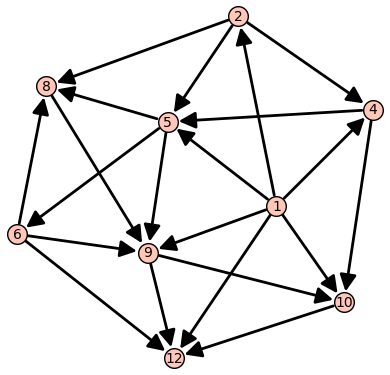

In [13]:
render_conflict_graph(conflict_graph)